In [2]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a model with Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 17s 7ms/step - loss: 0.2432 - accuracy: 0.9299 - val_loss: 0.1027 - val_accuracy: 0.9710
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1122 - accuracy: 0.9657 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 0.0911 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.0727 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 0.0706 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/

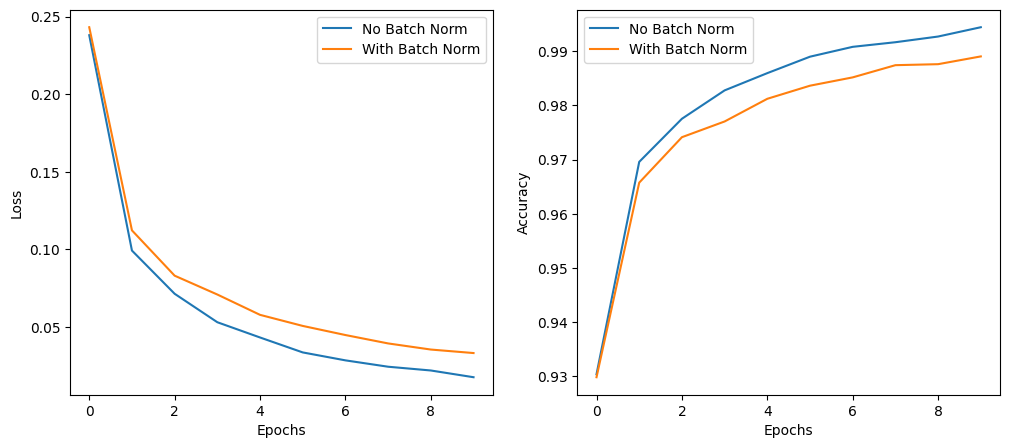

In [3]:
import matplotlib.pyplot as plt

# Training the model without Batch Normalization
model_no_bn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_no_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)

# Plot the training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['loss'], label='No Batch Norm')
plt.plot(model.history.history['loss'], label='With Batch Norm')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['accuracy'], label='No Batch Norm')
plt.plot(model.history.history['accuracy'], label='With Batch Norm')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()